<a href="https://colab.research.google.com/github/Group10-AIProject/G10-AI-Project/blob/main/13102024_Resnet152_train_val_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Librabries**

In [ ]:
!pip install protobuf==3.20.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.21.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.65.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.2

In [ ]:
!pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 97.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 24.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: 

In [ ]:
from numpy.random import seed
seed(101)

import pandas as pd
import numpy as np
import keras
#from keras import backend as K

import tensorflow
tensorflow.random.set_seed(101)
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import (BatchNormalization, Dense, Dropout, Flatten)
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Create the directory structure**

In [ ]:
static = '/content/static'
os.mkdir(static)

In [ ]:
images = os.path.join(static,'images')
os.mkdir(images)

In [ ]:
# Create a new directory
base_dir_1 = '/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1'
os.mkdir(base_dir_1)

# [now we create 4 folder inside 'base_dir']
# train_dir: av, ak, ez, ps
# val_dir: av, ak, ez, ps

# create a path to 'base_dir' to which I will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir_1, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir_1,'val_dir')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join(base_dir_1, 'test_dir')
os.mkdir(test_dir)

# Create the new folders inside train_dir
av = os.path.join(train_dir, 'av')
os.mkdir(av)
ak = os.path.join(train_dir, 'ak')
os.mkdir(ak)
ez = os.path.join(train_dir, 'ez')
os.mkdir(ez)
ps = os.path.join(train_dir, 'ps')
os.mkdir(ps)

# Create the new folders inside val_dir
av = os.path.join(val_dir, 'av')
os.mkdir(av)
ak = os.path.join(val_dir, 'ak')
os.mkdir(ak)
ez = os.path.join(val_dir, 'ez')
os.mkdir(ez)
ps = os.path.join(val_dir, 'ps')
os.mkdir(ps)

# Create the new folders inside test_dir
av = os.path.join(test_dir, 'av')
os.mkdir(av)
ak = os.path.join(test_dir, 'ak')
os.mkdir(ak)
ez = os.path.join(test_dir, 'ez')
os.mkdir(ez)
ps = os.path.join(test_dir, 'ps')
os.mkdir(ps)


##Create a stratified train/test/val set

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Dataset/skin-lesion-test-metadata.csv')

df_data.head(20)

,image_id,dx
0,000055VB,ak
1,000069HB,ak
2,000070VB,ak
3,000082HB,ak
4,000084HB,ak
5,000493HB,ak
6,000495HB,ak
7,000498HB,ak
8,000500HB,ak
9,004945VB,ak


In [ ]:
df_data.shape

(3293, 2)

In [ ]:
y = df_data['dx']
_, df_test = train_test_split(df_data, test_size = 0.15, random_state=101, stratify=y)
df_test.shape


(494, 2)

In [ ]:
df_test['dx'].value_counts()

,count
dx,
av,247
ak,143
ez,66
ps,38


Create a train set that excludes images that are in the val/test set

In [ ]:
def identify_test_rows(x):
  # create a list of all the lesion id in the val set
  test_list = list(df_test['image_id'])


  if str(x) in test_list:
    return 'test'
  else:
    return 'train'

In [ ]:
df_data['train or test'] = df_data['image_id']
df_data['train or test'] = df_data['train or test'].apply(identify_test_rows)

df_train = df_data[df_data['train or test'] == 'train']

In [ ]:
print(len(df_train))
print(len(df_test))

2799
494


In [ ]:
df_train.shape

(2799, 3)

In [ ]:
df_test.shape

(494, 2)

In [ ]:
df_train.head(20)

,image_id,dx,train or test
0,000055VB,ak,train
1,000069HB,ak,train
2,000070VB,ak,train
4,000084HB,ak,train
6,000495HB,ak,train
7,000498HB,ak,train
8,000500HB,ak,train
9,004945VB,ak,train
11,004948VB,ak,train
12,004949VB,ak,train


In [ ]:
del df_train['train or test']

In [ ]:
df_train.head(10)

,image_id,dx
0,000055VB,ak
1,000069HB,ak
2,000070VB,ak
4,000084HB,ak
6,000495HB,ak
7,000498HB,ak
8,000500HB,ak
9,004945VB,ak
11,004948VB,ak
12,004949VB,ak


In [ ]:
z = df_train['dx']
_, df_val = train_test_split(df_train, test_size = 0.18, random_state=101, stratify=z)

df_val.shape

(504, 2)

In [ ]:
def identify_val_rows(x):
  # create a list of all the lesion id in the val set
  val_list = list(df_val['image_id'])


  if str(x) in val_list:
    return 'val'
  else:
    return 'train'

In [ ]:
df_train['train or val'] = df_train['image_id']
df_train['train or val'] = df_train['train or val'].apply(identify_val_rows)

df_train_1 = df_train[df_train['train or val'] == 'train']

<ipython-input-19-e8795bc33420>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train or val'] = df_train['image_id']
<ipython-input-19-e8795bc33420>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train or val'] = df_train['train or val'].apply(identify_val_rows)


In [ ]:
df_train_1.shape

(2295, 3)

In [ ]:
df_val.shape

(504, 2)

In [ ]:
del df_train_1['train or val']

In [ ]:
df_train_1.shape

(2295, 2)

In [ ]:
df_val['dx'].value_counts()

,count
dx,
av,252
ak,146
ez,67
ps,39


In [ ]:
df_train_1['dx'].value_counts()

,count
dx,
av,1150
ak,666
ez,304
ps,175


In [ ]:
df_data['dx'].value_counts()

,count
dx,
av,1649
ak,955
ez,437
ps,252


#**Transfer the images into the folders**

In [ ]:
df_data.set_index('image_id', inplace=True)

In [ ]:
folder_1 = os.listdir('/content/drive/MyDrive/Dataset/skin-disease-3293')
for file in folder_1:
  print(file)

016408HB.jpg
016036VB.jpg
017474HB.jpg
016756HB.jpg
017552HB.jpg
017476HB.jpg
016793HB.jpg
016936HB.jpg
017965HB.jpg
017593HB.jpg
016459HB.jpg
017268HB.jpg
016071HB.jpg
016053HB.jpg
016494HB.jpg
017076HB.jpg
016423HB.jpg
016758HB.jpg
017296HB.jpg
016330HB.jpg
004951HB.jpg
016940HB.jpg
017517HB.jpg
017240HB.jpg
016390HB.jpg
017254HB.jpg
017171HB.jpg
045966HB.jpg
017209HB.jpg
016072HB.jpg
017471HB.jpg
017559HB.jpg
016254HB.jpg
017113HB.jpg
016911VB.jpg
016385VB.jpg
016590HB.jpg
016435HB.jpg
016831HB.jpg
016174HB.jpg
017540HB.jpg
017146VB.jpg
017036VB.jpg
017959HB.jpg
017608HB.jpg
016222HB.jpg
016962VB.jpg
017196HB.jpg
017654VB.jpg
017839HB.jpg
017897VB.jpg
017218HB.jpg
016694VB.jpg
017606HB.jpg
016670HB.jpg
017560HB.jpg
017115HB.jpg
016412HB.jpg
016923HB.jpg
016239HB.jpg
016665HB.jpg
017330VB.jpg
017821HB.jpg
017549HB.jpg
016522HB.jpg
017680HB.jpg
017822HB.jpg
016409VB.jpg
016985HB.jpg
016189VB.jpg
017480HB.jpg
016360HB.jpg
017353VB.jpg
016286HB.jpg
016992HB.jpg
016778HB.jpg
016847HB.jpg

In [ ]:
# Get a list of train and val images
train_list = list(df_train_1['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

# Transfer the train images

for image in train_list:
  fname = image + '.jpg'
  label = df_data.loc[image,'dx']

  if fname in folder_1:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-3293', fname)
    # Destination path to image
    dst = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir', label, fname)
    # Copy the image from  source to de destination
    shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
  fname = image + '.jpg'
  label = df_data.loc[image,'dx']

  if fname in folder_1:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-3293', fname)
    # Destination path to image
    dst = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/val_dir', label, fname)
    # Copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the test image

for image in test_list:
  fname = image + '.jpg'
  label = df_data.loc[image,'dx']

  if fname in folder_1:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-3293', fname)
    # Destination path to image
    dst = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/test_dir', label, fname)
    # Copy the image from the source to the destination
    shutil.copyfile(src, dst)


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/ak')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/av')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/ez')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/ps')))

666
1150
304
175


#**Data Augmentation**

In [ ]:
# note that we are not augmenting class 'nv'
class_list = ['ak', 'av', 'ez', 'ps']

for item in class_list:

    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = '/content/drive/MyDrive/Dataset/skin-disease-new-1/aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-new-1/aug_dir', 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join('/content/drive/MyDrive/Dataset/skin-disease-new-1/aug_dir/img_dir', fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders

    ###########

    num_aug_images_wanted = 4000 # total number of images we want to have in each class

    ###########

    num_files = len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/aug_dir/img_dir'))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('/content/drive/MyDrive/Dataset/skin-disease-new-1/aug_dir')

Found 666 images belonging to 1 classes.
Found 1150 images belonging to 1 classes.
Found 304 images belonging to 1 classes.
Found 175 images belonging to 1 classes.


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/ak')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/av')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/ez')))
print(len(os.listdir('/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir/ps')))


3880
4000
3544
3550


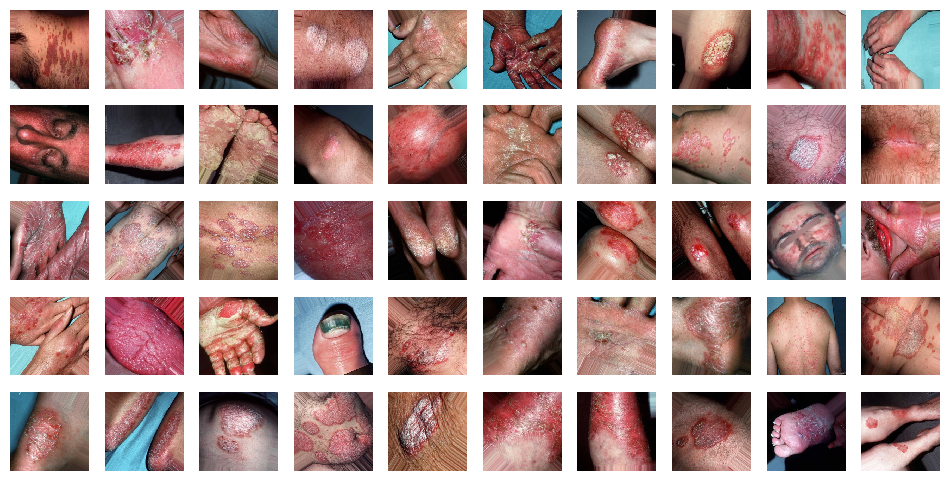

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
plots(imgs, titles=None)

##All Data

In [ ]:
train_path = '/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/train_dir'
valid_path = '/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/val_dir'
test_path = '/content/drive/MyDrive/Dataset/skin-disease-new-1/base_dir_1/test_dir'

IMAGE_SHAPE = (192, 256, 3)
data_gen_param = {
    "samplewise_center": True,
    "samplewise_std_normalization": True,
    "rotation_range": 90,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "zoom_range": 0.2,
    "horizontal_flip": True,
    "vertical_flip": True,
    "rescale": 1.0 / 255
}
data_generator = ImageDataGenerator(**data_gen_param)

train_flow_param = {
    "directory": train_path,
    "batch_size": 64,
    "target_size": IMAGE_SHAPE[:2],
    "shuffle": True
}
train_flow = data_generator.flow_from_directory(**train_flow_param)

val_flow_param = {
    "directory": valid_path,
    "batch_size": 64,
    "target_size": IMAGE_SHAPE[:2],
    "shuffle": False
}
val_flow = data_generator.flow_from_directory(**val_flow_param)

test_flow_param = {
    "directory": test_path,
    "batch_size": 1,
    "target_size": IMAGE_SHAPE[:2],
    "shuffle": False
}
test_flow = data_generator.flow_from_directory(**test_flow_param)

Found 14974 images belonging to 4 classes.
Found 504 images belonging to 4 classes.
Found 494 images belonging to 4 classes.


#**Built the model**

In [ ]:
from keras.models import Sequential
from keras.layers import (BatchNormalization, Dense, Dropout, Flatten)
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

In [ ]:
pre_trained_model = ResNet152(input_shape= (192, 256, 3), include_top=False, weights = 'imagenet')

234708992/234698864 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False

print(len(pre_trained_model.layers))

input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

In [ ]:
last_layer = pre_trained_model.get_layer('conv5_block3_out')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 6, 8, 2048)


In [ ]:
from tensorflow.keras import layers

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(4, activation='softmax')(x)

In [ ]:
import tensorflow as tf


In [ ]:
model = Model(pre_trained_model.input, x)

def top_2_acc(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

def top_3_acc(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

optimizer = Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[categorical_accuracy, top_2_acc, top_3_acc])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 198, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 96, 128, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 96, 128, 64)  256         ['conv1_conv[0][0]']         

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [ ]:
optimizer = Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[categorical_accuracy, top_2_acc, top_3_acc])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 198, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 96, 128, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 96, 128, 64)  256         ['conv1_conv[0][0]']         

##Run01

In [ ]:
filepath = "/content/drive/MyDrive/Model/ResNet152_11102024_1.h5"

checkpoint_param = {
    "filepath": filepath,
    "monitor": "val_categorical_accuracy",
    "verbose": 1,
    "save_best_only": True,
    "mode": "max"
}
checkpoint = ModelCheckpoint(**checkpoint_param)

lr_decay_params = {
    "monitor": "val_loss",
    "factor": 0.5,
    "patience": 3,
    "min_lr": 1e-5
}
lr_decay = ReduceLROnPlateau(**lr_decay_params)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

In [ ]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 64
val_batch_size = 64


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
fit_params = {
    "generator": train_flow,
    "steps_per_epoch": train_steps,
    "epochs": 10,
    "verbose": 1,
    "validation_data": val_flow,
    "validation_steps": val_steps,
    "callbacks": [checkpoint, lr_decay, early_stopping]
}
print("Training the model...")

history = model.fit_generator(**fit_params)
print("Done!")

Training the model...


<ipython-input-73-656547c66318>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(**fit_params)


Epoch 1/10
44/44 [==============================] - 546s 12s/step - loss: 1.7634 - categorical_accuracy: 0.6378 - top_2_acc: 0.8544 - top_3_acc: 0.9567 - val_loss: 5.0328 - val_categorical_accuracy: 0.0754 - val_top_2_acc: 0.3234 - val_top_3_acc: 0.5198 - lr: 1.0000e-04
Epoch 2/10
44/44 [==============================] - ETA: 0s - loss: 0.9656 - categorical_accuracy: 0.6985 - top_2_acc: 0.8938 - top_3_acc: 0.9737
Epoch 2: val_categorical_accuracy improved from 0.07540 to 0.12302, saving model to /content/drive/MyDrive/Model/ResNet152_11102024_1.h5
44/44 [==============================] - 459s 10s/step - loss: 0.9656 - categorical_accuracy: 0.6985 - top_2_acc: 0.8938 - top_3_acc: 0.9737 - val_loss: 3.7581 - val_categorical_accuracy: 0.1230 - val_top_2_acc: 0.2123 - val_top_3_acc: 0.5278 - lr: 1.0000e-04
Epoch 3/10
44/44 [==============================] - ETA: 0s - loss: 0.7221 - categorical_accuracy: 0.7610 - top_2_acc: 0.9197 - top_3_acc: 0.9773
Epoch 3: val_categorical_accuracy improv

In [ ]:
custom_object = {'top_2_acc':top_2_acc,
                  'top_3_acc':top_3_acc}

##Run02

In [ ]:
new_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Model/ResNet152_11102024_1.h5', custom_objects=custom_object)

In [ ]:
new_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 198, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 96, 128, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 96, 128, 64)  256         ['conv1_conv[0][0]']       

In [ ]:
filepath = "/content/drive/MyDrive/Model/ResNet152_11102024_2.h5"

checkpoint_param = {
    "filepath": filepath,
    "monitor": "val_categorical_accuracy",
    "verbose": 1,
    "save_best_only": True,
    "mode": "max"
}
checkpoint = ModelCheckpoint(**checkpoint_param)

lr_decay_params = {
    "monitor": "val_loss",
    "factor": 0.5,
    "patience": 4,
    "min_lr": 1e-5
}
lr_decay = ReduceLROnPlateau(**lr_decay_params)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

In [ ]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 64
val_batch_size = 64


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
fit_params = {
    "generator": train_flow,
    "steps_per_epoch": train_steps,
    "epochs": 15,
    "verbose": 1,
    "validation_data": val_flow,
    "validation_steps": val_steps,
    "callbacks": [checkpoint, lr_decay, early_stopping]
}
print("Training the model...")

history = new_model.fit_generator(**fit_params)
print("Done!")

Training the model...


<ipython-input-79-1106cf402a53>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(**fit_params)


Epoch 1/15
44/44 [==============================] - ETA: 0s - loss: 0.3057 - categorical_accuracy: 0.8995 - top_2_acc: 0.9737 - top_3_acc: 0.9929
Epoch 1: val_categorical_accuracy improved from -inf to 0.56944, saving model to /content/drive/MyDrive/Model/ResNet152_11102024_2.h5
44/44 [==============================] - 424s 9s/step - loss: 0.3057 - categorical_accuracy: 0.8995 - top_2_acc: 0.9737 - top_3_acc: 0.9929 - val_loss: 1.8981 - val_categorical_accuracy: 0.5694 - val_top_2_acc: 0.8552 - val_top_3_acc: 0.9444 - lr: 1.0000e-04
Epoch 2/15
44/44 [==============================] - ETA: 0s - loss: 0.2777 - categorical_accuracy: 0.9073 - top_2_acc: 0.9787 - top_3_acc: 0.9964
Epoch 2: val_categorical_accuracy improved from 0.56944 to 0.68056, saving model to /content/drive/MyDrive/Model/ResNet152_11102024_2.h5
44/44 [==============================] - 418s 9s/step - loss: 0.2777 - categorical_accuracy: 0.9073 - top_2_acc: 0.9787 - top_3_acc: 0.9964 - val_loss: 1.0310 - val_categorical_a

In [ ]:
custom_object = {'top_2_acc':top_2_acc,
                  'top_3_acc':top_3_acc}

##Run03

In [ ]:
new_model_1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Model/ResNet152_11102024_2.h5', custom_objects=custom_object)

In [ ]:
new_model_1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 198, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 96, 128, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 96, 128, 64)  256         ['conv1_conv[0][0]']       

In [ ]:
filepath = "/content/drive/MyDrive/Model/ResNet152_13102024.h5"

checkpoint_param = {
    "filepath": filepath,
    "monitor": "val_categorical_accuracy",
    "verbose": 1,
    "save_best_only": True,
    "mode": "max"
}
checkpoint = ModelCheckpoint(**checkpoint_param)

lr_decay_params = {
    "monitor": "val_loss",
    "factor": 0.5,
    "patience": 4,
    "min_lr": 1e-5
}
lr_decay = ReduceLROnPlateau(**lr_decay_params)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

In [ ]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 64
val_batch_size = 64


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
fit_params = {
    "generator": train_flow,
    "steps_per_epoch": train_steps,
    "epochs": 20,
    "verbose": 1,
    "validation_data": val_flow,
    "validation_steps": val_steps,
    "callbacks": [checkpoint, lr_decay, early_stopping]
}
print("Training the model...")

history = new_model.fit_generator(**fit_params)
print("Done!")

Training the model...


<ipython-input-47-041fad487d34>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(**fit_params)


Epoch 1/20
44/44 [==============================] - ETA: 0s - loss: 0.1533 - categorical_accuracy: 0.9496 - top_2_acc: 0.9911 - top_3_acc: 0.9993 
Epoch 1: val_categorical_accuracy improved from -inf to 0.84921, saving model to /content/drive/MyDrive/Model/ResNet152_13102024.h5
44/44 [==============================] - 688s 15s/step - loss: 0.1533 - categorical_accuracy: 0.9496 - top_2_acc: 0.9911 - top_3_acc: 0.9993 - val_loss: 0.6977 - val_categorical_accuracy: 0.8492 - val_top_2_acc: 0.9444 - val_top_3_acc: 0.9821 - lr: 5.0000e-05
Epoch 2/20
44/44 [==============================] - ETA: 0s - loss: 0.0745 - categorical_accuracy: 0.9769 - top_2_acc: 0.9986 - top_3_acc: 0.9993
Epoch 2: val_categorical_accuracy improved from 0.84921 to 0.89683, saving model to /content/drive/MyDrive/Model/ResNet152_13102024.h5
44/44 [==============================] - 448s 10s/step - loss: 0.0745 - categorical_accuracy: 0.9769 - top_2_acc: 0.9986 - top_3_acc: 0.9993 - val_loss: 0.4937 - val_categorical_ac

In [ ]:
custom_object = {'top_2_acc':top_2_acc,
                  'top_3_acc':top_3_acc}

#**ĐÁNH GIÁ KẾT QUẢ TRÊN TẬP TEST**

In [ ]:
new_model_2 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Model/ResNet152_13102024.h5', custom_objects=custom_object)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
new_model_2.metrics_names

['loss', 'categorical_accuracy', 'top_2_acc', 'top_3_acc']

In [ ]:
test_labels = test_flow.classes

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predictions = new_model_2.predict(test_flow, steps=len(df_test), verbose=1)

494/494 [==============================] - 99s 195ms/step


In [ ]:
predictions.shape

(494, 4)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[139   3   1   0]
 [  2 243   2   0]
 [  4  11  45   6]
 [  2   2   4  30]]


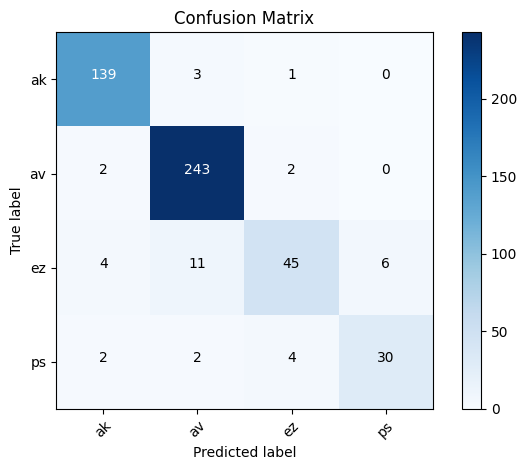

In [ ]:
cm_plot_labels = ['ak', 'av', 'ez', 'ps']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_flow.classes

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names = cm_plot_labels)

print(report)

              precision    recall  f1-score   support

          ak       0.95      0.97      0.96       143
          av       0.94      0.98      0.96       247
          ez       0.87      0.68      0.76        66
          ps       0.83      0.79      0.81        38

    accuracy                           0.93       494
   macro avg       0.90      0.86      0.87       494
weighted avg       0.92      0.93      0.92       494

